# <span style="color:red"> NSL Esercitazione 6 </span>
### <span style="color:pink">  Giacomo Boringhieri 13457A</span>

Il modello di Ising è un modello teorico che descrive un insieme di spin disposti, nel caso unidimensionale, lungo una catena lineare. Ogni spin può assumere due valori possibili, $( \pm 1 )$. Se si considerano soltanto interazioni tra primi vicini, ogni coppia di spin interagisce attraverso un termine di scambio che tende a favorire configurazioni parallele e a sfavorire quelle antiparallele. L’energia complessiva del sistema dipende quindi dall’orientamento relativo degli spin: quando uno di essi viene invertito, la variazione di energia è determinata dallo stato dei suoi vicini.  

Il modello in una dimensione ammette una soluzione esatta. L’Hamiltoniana è:  

$$H = -J \sum_{i=1}^N s_i s_{i+1} - \frac{h}{2} \sum_{i=1}^N (s_i + s_{i+1})$$

dove $( J > 0 )$ e si impone la condizione periodica $( s_{N+1} = s_1 )$, come se la catena fosse chiusa ad anello.  

La funzione di partizione $( Z )$ è:  

$$
Z = \sum_{\{ s_i \}} \exp \left( -\beta H \right) = \lambda_1^N + \lambda_2^N
$$

con  

$$
\lambda_{1,2} = e^{\beta J} \cosh(\beta h) \pm \left[ e^{2 \beta J} \cosh^2(\beta h) - 2 \sinh(2 \beta J) \right]^{1/2}
$$

dove $(\beta = \frac{1}{k_B T} = \frac{1}{T})$.

Il modello di Ising è influenzato dalla temperatura, che determina l’intensità delle interazioni tra gli spin. A basse temperature prevale l’interazione di scambio, che favorisce l’allineamento degli spin. A temperature elevate, invece, l’agitazione termica tende a disordinare il sistema e la magnetizzazione si riduce fino a valori trascurabili.  

Lo scopo dell’esercizio è analizzare come variano energia interna, calore specifico, suscettibilità magnetica e magnetizzazione al variare della temperatura $T \in [0.5, 2.0]$.  
Queste grandezze termodinamiche si ricavano dalla funzione di partizione $Z$:  

- **Energia interna per spin** ($h = 0$):  

$$
U(N,T) = \langle H \rangle_{h=0}
$$

- **Calore specifico** ($h = 0$):  

$$
C(N,T) = k_B \beta^2 ( \langle H^2 \rangle_{h=0} - \langle H \rangle_{h=0}^2 )
$$

- **Magnetizzazione** ($h \neq 0$):  

$$
M(N,T,h=0.02) = \langle \sum_{i=1}^N s_i \rangle_{h=0.02}
$$

Se $h = 0$, la magnetizzazione risulta nulla, poiché non ci sono campi esterni che inducono l’allineamento degli spin.  

- **Suscettibilità magnetica** ($h = 0$):  

$$
\chi(N,T) = \beta \langle ( \sum_{i=1}^N s_i )^2 \rangle_{h=0}
$$

## <span style="color: blue"> Esercizio 6.1 </span>

Il modello di Ising può essere studiato anche tramite simulazioni numeriche. Per farlo è necessario disporre di un metodo che consenta di campionare secondo il peso di Boltzmann  $p(\{s_i\}) = \exp(-\beta H)/Z$.  
In questa attività sono stati considerati due approcci differenti:  

- **Metodo di Metropolis**: consiste nel selezionare in modo casuale uno spin e proporne il ribaltamento. La nuova configurazione viene accettata con probabilità  
$$
p(s \to s') = \min(1, e^{-\beta \Delta E})
$$  
dove $\Delta E$ rappresenta la variazione di energia. Le transizioni che riducono l’energia sono sempre accettate, mentre quelle che la aumentano possono essere rifiutate.  

- **Metodo di Gibbs**: a differenza del Metropolis, non prevede il rifiuto delle mosse. In questo caso, infatti, lo spin viene aggiornato campionandolo direttamente dalla distribuzione condizionale fissati gli altri spin. La probabilità che lo spin $s_i$ assuma valore $+1$ è data da  
$$
p(s_i = +1 \, | \, \{s_j\}_{j \neq i}) = \frac{1}{1 + \exp \left( -2\beta \sum_{j \in \text{vicini}} J_{ij} s_j \right)}
$$  

La temperatura ha un ruolo determinante nel comportamento del sistema: a valori bassi prevalgono le interazioni di scambio, che inducono un ordine spontaneo con magnetizzazione finita; a valori alti domina l’agitazione termica, portando a configurazioni disordinate e a una magnetizzazione prossima a zero.  

Nel corso dello studio, sono state analizzate in funzione della temperatura le seguenti osservabili:  
- **Energia interna**, che rappresenta l’energia media del sistema  
- **Calore specifico**, che misura come varia l’energia al crescere della temperatura  
- **Suscettibilità magnetica**, che quantifica la risposta a un campo magnetico applicato  
- **Magnetizzazione**, che indica l’allineamento medio degli spin

Ora mostro i risultati ottenuti dalla simulazione, prima ho confrontato i due metodi tra di loro, ho poi confrontato ogni metodo singolarmente con l'andamento teorico

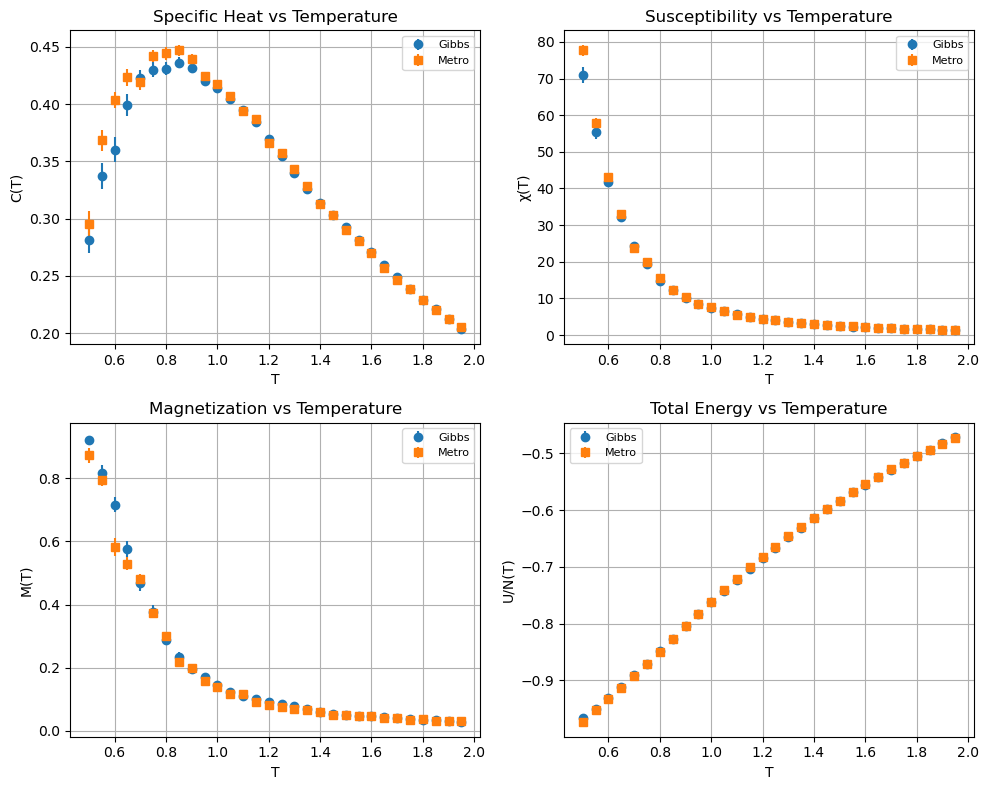

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Base path
base_gibbs = "OUTPUT/T_FUNCTIONS_GIBBS/"
base_metro = "OUTPUT/T_FUNCTIONS_METRO/"

# Lista dei file e titoli associati
quantities = [
    ("specific_heat_T.dat", "Specific Heat", "C(T)"),
    ("susceptibility_T.dat", "Susceptibility", "χ(T)"),
    ("magnetization_T.dat", "Magnetization", "M(T)"),
    ("total_energy_T.dat", "Total Energy", "U/N(T)")
]

# Creazione della griglia 2x2
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()  # così possiamo iterare facilmente

for ax, (filename, title, ylabel) in zip(axes, quantities):
    file_gibbs = base_gibbs + filename
    file_metro = base_metro + filename

    try:
        # Caricamento dati
        data_gibbs = np.loadtxt(file_gibbs)
        data_metro = np.loadtxt(file_metro)

        x_gibbs, y_gibbs, yerr_gibbs = data_gibbs[:, 0], data_gibbs[:, 1], data_gibbs[:, 2]
        x_metro, y_metro, yerr_metro = data_metro[:, 0], data_metro[:, 1], data_metro[:, 2]

        # Disegno sugli assi corrispondenti
        ax.errorbar(x_gibbs, y_gibbs, yerr=yerr_gibbs, label="Gibbs", color="tab:blue", fmt="o")
        ax.errorbar(x_metro, y_metro, yerr=yerr_metro, label="Metro", color="tab:orange", fmt="s")

        ax.set_xlabel("T")
        ax.set_ylabel(ylabel)
        ax.set_title(f"{title} vs Temperature")
        ax.grid(True)
        ax.legend(fontsize=8)

    except Exception as e:
        print(f"Errore nel leggere o plottare i dati per {title}: {e}")

# Layout più compatto
plt.tight_layout()
plt.show()

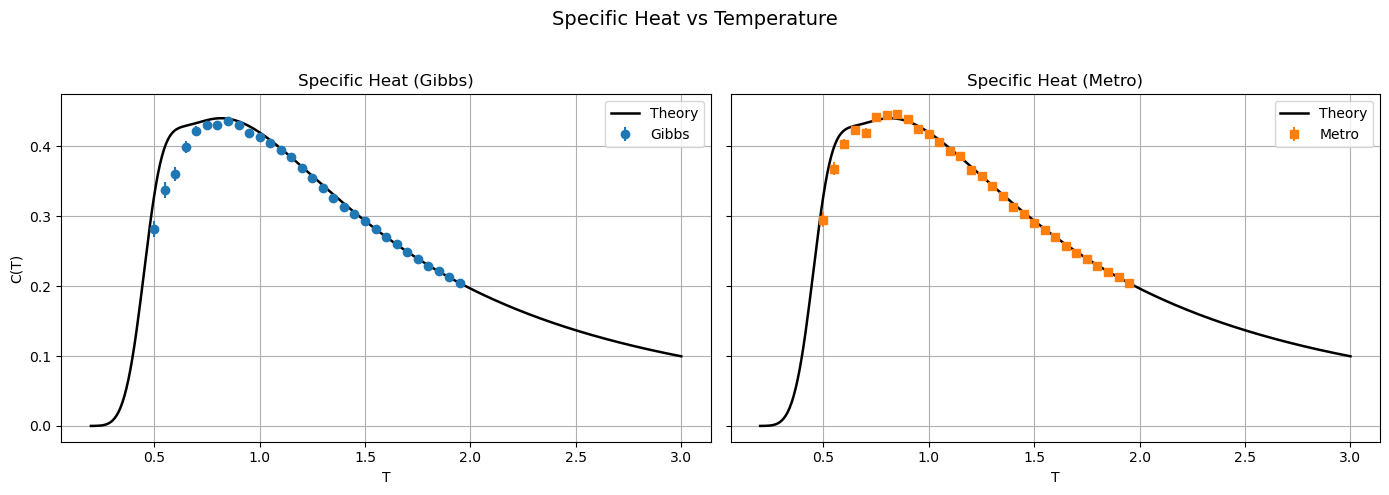

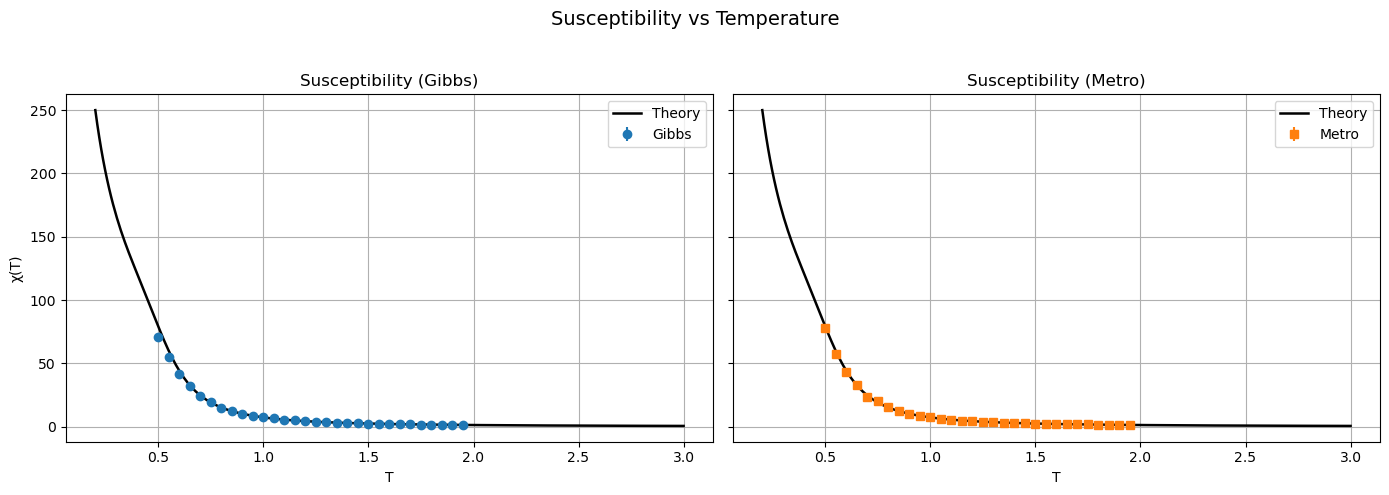

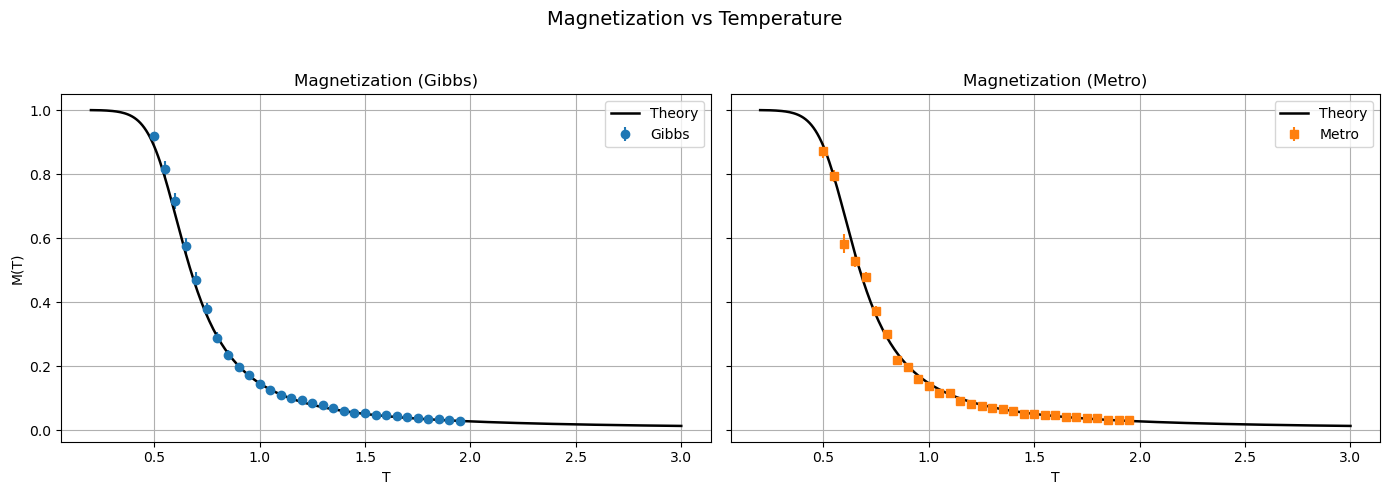

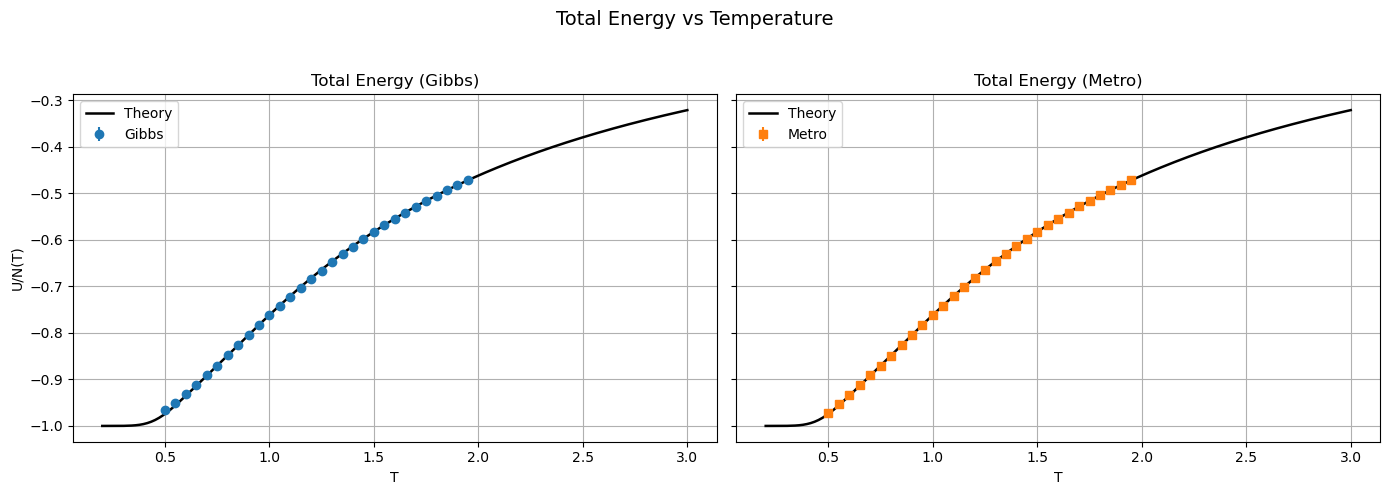

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# === PATHS ===
base_gibbs = "OUTPUT/T_FUNCTIONS_GIBBS/"
base_metro = "OUTPUT/T_FUNCTIONS_METRO/"

# === PARAMETRI TEORICI ===
J = 1.0
Ns = 50
h = 0.02
points = 300
T_theory = np.linspace(0.2, 3.0, num=points)
beta = 1.0 / T_theory

# === CURVE TEORICHE ===
th = np.tanh(J / T_theory)
thN = th ** Ns
ch = 1 / th
E_theory = -J * (th + ch * thN) / (1 + thN)

C_theory = ((beta * J) ** 2) * (
    (1 + thN + (Ns - 1) * (th**2) + (Ns - 1) * (ch**2) * thN) / (1 + thN)
    - Ns * ((th + ch * thN) / (1 + thN)) ** 2
)

X_theory = beta * np.exp(2 * beta * J) * (1 - thN) / (1 + thN)

b = beta
l1 = np.exp(b * J) * np.cosh(b * h) + np.sqrt(
    np.exp(2 * b * J) * np.cosh(b * h) ** 2 - 2 * np.sinh(2 * b * J)
)
l2 = np.exp(b * J) * np.cosh(b * h) - np.sqrt(
    np.exp(2 * b * J) * np.cosh(b * h) ** 2 - 2 * np.sinh(2 * b * J)
)
Z = l1**Ns + l2**Ns
M_theory = (
    np.exp(b * J)
    * np.sinh(b * h)
    * (
        (l1 ** (Ns - 1))
        * (1 + np.exp(b * J) * np.cosh(b * h) / np.sqrt(np.exp(2 * b * J) * np.cosh(b * h) ** 2 - 2 * np.sinh(2 * b * J)))
        + (l2 ** (Ns - 1))
        * (1 - np.exp(b * J) * np.cosh(b * h) / np.sqrt(np.exp(2 * b * J) * np.cosh(b * h) ** 2 - 2 * np.sinh(2 * b * J)))
    )
    / Z
)

# === LISTA DATI ===
quantities = [
    ("specific_heat_T.dat", "Specific Heat", "C(T)", C_theory),
    ("susceptibility_T.dat", "Susceptibility", "χ(T)", X_theory),
    ("magnetization_T.dat", "Magnetization", "M(T)", M_theory),
    ("total_energy_T.dat", "Total Energy", "U/N(T)", E_theory),
]

for filename, title, ylabel, theory_curve in quantities:
    file_gibbs = base_gibbs + filename
    file_metro = base_metro + filename

    try:
        data_gibbs = np.loadtxt(file_gibbs)
        data_metro = np.loadtxt(file_metro)

        x_gibbs, y_gibbs, yerr_gibbs = data_gibbs[:, 0], data_gibbs[:, 1], data_gibbs[:, 2]
        x_metro, y_metro, yerr_metro = data_metro[:, 0], data_metro[:, 1], data_metro[:, 2]

        # === due pannelli affiancati ===
        fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

        # --- Gibbs ---
        axs[0].errorbar(x_gibbs, y_gibbs, yerr=yerr_gibbs,
                        label="Gibbs", color="tab:blue", fmt="o")
        axs[0].plot(T_theory, theory_curve, "k-", label="Theory", linewidth=1.8)
        axs[0].set_title(f"{title} (Gibbs)")
        axs[0].set_xlabel("T")
        axs[0].set_ylabel(ylabel)
        axs[0].grid(True)
        axs[0].legend()

        # --- Metro ---
        axs[1].errorbar(x_metro, y_metro, yerr=yerr_metro,
                        label="Metro", color="tab:orange", fmt="s")
        axs[1].plot(T_theory, theory_curve, "k-", label="Theory", linewidth=1.8)
        axs[1].set_title(f"{title} (Metro)")
        axs[1].set_xlabel("T")
        axs[1].grid(True)
        axs[1].legend()

        fig.suptitle(f"{title} vs Temperature", fontsize=14)
        fig.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

    except Exception as e:
        print(f"Errore nel leggere o plottare i dati per {title}: {e}")

Dai grafici si può vedere come la simulazione si confronti bene con l'andamento teorico e anche come i due metodi sostanzialmente si egauglino.

Infine, è interessante osservare l'andamento dell'accettazione in funzione della temperatura. Ovviamente, tale analisi ha senso solo nel caso dell'algoritmo di Metropolis, perché Gibss ha accettanza sempre pari a 1

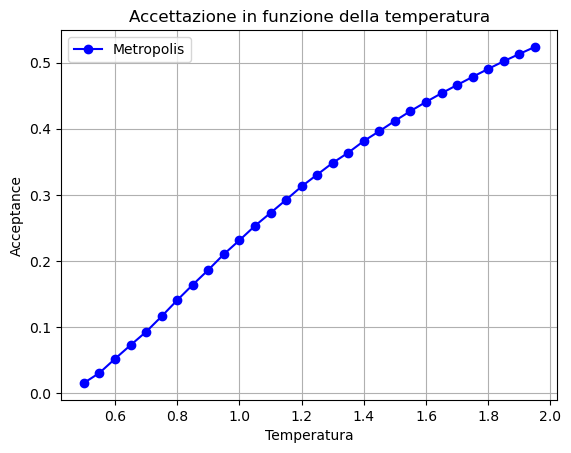

In [4]:
import numpy as np
import matplotlib.pyplot as plt

data_m = np.loadtxt("OUTPUT/T_FUNCTIONS_METRO/acceptance.dat")
#data_g = np.loadtxt("06.1/simulazioni-eseguite/gibbs/acceptance.dat")

T = data_m[:,0] 
acc_m = data_m[:,1] 
#acc_g = data_g[:,1] 

plt.plot(T, acc_m, 'b-', marker='o', label='Metropolis')
plt.xlabel("Temperatura")
plt.ylabel("Acceptance")
plt.title("Accettazione in funzione della temperatura")
plt.grid(True)
plt.legend()
plt.show()

Si osserva che l'accettazione aumenta con l'aumentare della temperatura: questo si spiega perché, a basse temperature, la maggior parte degli stati del sistema sono "congelati" attorno all'energia minima, pertanto vengono accettate solo poche mosse.